# Introduction

For our judgement of the best place to live, we decided to focus on health. Our metrics involve depression and anxiety to cover mental health, as well as diabetes to cover physical health.
Since health and happiness are largely intertwined and also highly dependent on the environment one is in, we thought these would be perfect ways to measure the quality of a community.

# Our Metrics and the Calculations

### Depression

First, we chose the percentage of people taking depression medication because environement is a major factor in developing depression. A place that has a low percentage of depressed people is likely one that is a good place to live, and vice versa.


In [3]:
import pandas as pd

depression = pd.read_csv('depression_all_2016.csv')
census_tracts = {}
for index, row in depression.iterrows():
    if(row['CT']//100 < 9000):
        census_tracts[row['CT']//100] = row['EPAN']/row['EPAD']

depression_df = pd.DataFrame(list(census_tracts.items()), columns=['Census Tract', '% On Depression Medication'])
depression_df = depression_df.sort_values(by='% On Depression Medication')
depression_df.reset_index(inplace = True)
depression_df = depression_df.drop(columns='index')

depression_df

,Census Tract,% On Depression Medication
0,2609,0.083512
1,1016,0.095718
2,5641,0.096712
3,4120,0.098026
4,2507,0.099010
...,...,...
344,404,0.209615
345,4270,0.215768
346,5521,0.217270
347,5620,0.217784


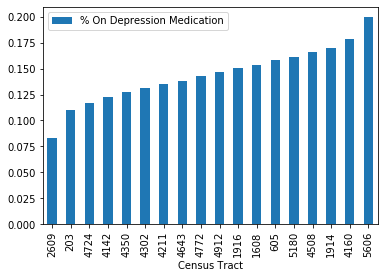

In [4]:
depression_df.iloc[0::20].plot(kind='bar', x='Census Tract', y='% On Depression Medication')

### Anxiety

We chose anxiety for similar reasons to depression. Environment is a major contributing factor to anxiety, so living in a place with low rates of it is preferable. We chose to do both anxiety and depression, as they are caused by different factors and are not necessarily correlated.


In [5]:
anxiety = pd.read_csv('anxiety_all_2016.csv')
census_tracts = {}
for index, row in anxiety.iterrows():
    if(row['CT']//100 < 9000):
        census_tracts[row['CT']//100] = row['XPAN']/row['XPAD']

anxiety_df = pd.DataFrame(list(census_tracts.items()), columns=['Census Tract', '% On Anxiety Medication'])
anxiety_df = anxiety_df.sort_values(by='% On Anxiety Medication')
anxiety_df.reset_index(inplace = True)
anxiety_df = anxiety_df.drop(columns='index')

anxiety_df

,Census Tract,% On Anxiety Medication
0,2609,0.062099
1,1303,0.095238
2,5619,0.099057
3,511,0.100000
4,1016,0.100756
...,...,...
343,4190,0.210633
344,4994,0.211234
345,5521,0.211699
346,4200,0.215278


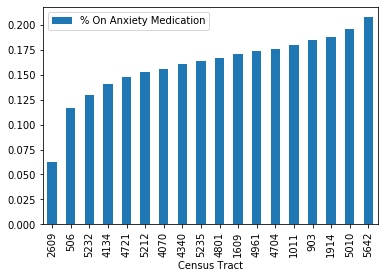

In [6]:
anxiety_df.iloc[0::20].plot(kind='bar', x='Census Tract', y='% On Anxiety Medication')

### Diabetes + Hyperlipidemia

To cover the physical side of health, we chose diabetes. Diabetes is a huge issue for many Americans today, and is closely related to issues with environment. Areas in food deserts make developing diabetes much more likely, and so finding a place where adequate nutrition is available is a must.


In [10]:
disease = pd.read_csv('diabetes_hyperlipidemia_all_2016.csv')
census_tracts = {}
for index, row in disease.iterrows():
    if(row['CT']//100 < 9000):
        census_tracts[row['CT']//100] = row['BLPAN']/row['BLPAD']

disease_df = pd.DataFrame(list(census_tracts.items()), columns=['Census Tract', '% w/ Diabetes or Hyperlipidemia'])
disease_df = disease_df.sort_values(by='% w/ Diabetes or Hyperlipidemia')
disease_df.reset_index(inplace = True)
disease_df = disease_df.drop(columns='index')
disease_df

,Census Tract,% w/ Diabetes or Hyperlipidemia
0,1402,0.017585
1,705,0.018478
2,708,0.019316
3,201,0.022605
4,807,0.023173
...,...,...
343,5010,0.113636
344,4870,0.114411
345,5120,0.118138
346,4281,0.125828


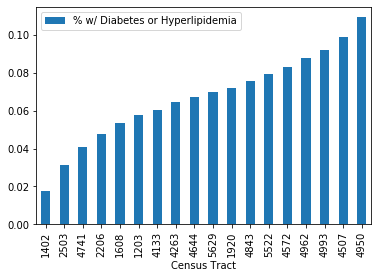

In [28]:
disease_df.iloc[0::20].plot(kind='bar', x='Census Tract', y='% w/ Diabetes or Hyperlipidemia')

### Combining the Three Metrics

In [31]:
ct_avgs = {};
for index, row in depression_df.iterrows():
    if row['Census Tract']//100 < 9000:
        ct = int(row['Census Tract'])
        if ct not in ct_avgs:
            ct_avgs[ct] = []
        ct_avgs[ct].append(index)
    
for index, row in anxiety_df.iterrows():
    if row['Census Tract']//100 < 9000:
        ct = int(row['Census Tract'])
        if ct not in ct_avgs:
            ct_avgs[ct] = []
        ct_avgs[ct].append(index)

for index, row in disease_df.iterrows():
    if row['Census Tract']//100 < 9000:
        ct = int(row['Census Tract'])
        if ct not in ct_avgs:
            ct_avgs[ct] = []
        ct_avgs[ct].append(index)       

for ct in ct_avgs.keys():
    ct_avgs[ct] = sum(ct_avgs[ct])/len(ct_avgs[ct])

avgs_df = pd.DataFrame(list(ct_avgs.items()), columns=['Census Tract', 'Average Ranking'])
avgs_df = avgs_df.sort_values(by='Average Ranking')
avgs_df.reset_index(inplace = True)
avgs_df = avgs_df.drop(columns='index')
avgs_df


,Census Tract,Average Ranking
0,2609,9.666667
1,807,22.333333
2,4120,23.333333
3,4090,27.000000
4,203,27.666667
...,...,...
344,5120,333.333333
345,5519,338.000000
346,4870,340.000000
347,4994,343.000000


# Conclusion

Based on the data we collected, we decided that the best place to live is **Northview Heights** (census tract number 2609). People in Northview Heights take the least amount of medication for depression and anxiety, and they also are the population with the least amount of cases of diabetes. 

We thought that the best neighborhood would be Northview Heights, but the results ended up showing that the neighborhood is actually not very safe and has a high poverty level. Since residents of Northview Heights do not have a lot of money, they may not be able to buy medications or afford health insurance. This is a possible cause for why there are lower percentages for medications taken for depression, anxiety, and diabetes. However, there are some good public schools that serve Northview Heights. This shows that the metrics we chose aren't good indicators for whether a community is good to live in. If we had looked at crime or drug abuse, Northview Heights would've gotten a much lower ranking. 

Obviously, we think Oakland is the best place in Pittsburgh (Hail to Pitt!). Oakland (Census Tract 406) was ranked 55th on our list.